In [86]:
import numpy as np 
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import cm
from scipy.stats import spearmanr, ttest_ind
%matplotlib inline

# Data Cleaning 

## Data
Since the data taken from the open government portals are in different formats, the data was converted into csv format to allow for uniform data

In [87]:
#Philippines Data
intPerYearMRT = pd.read_csv('DATA\interruptionsPerYear.csv') # https://www.foi.gov.ph/requests/aglzfmVmb2ktcGhyHgsSB0NvbnRlbnQiEURPVHItOTg0MTQ2ODQ2NjY2DA
intPerYearLRT = pd.read_csv('DATA\interruptionsPerYearLRT.csv') # https://www.foi.gov.ph/requests/aglzfmVmb2ktcGhyHgsSB0NvbnRlbnQiEUxSVEEtNDYxNzczOTYwMDUwDA
passPerMonthMRT = pd.read_csv('DATA\passengersPerMonth.csv') # https://data.gov.ph/dataset/2017-ridership-statistics
#Hong Kong Data
intPerYearHK = pd.read_csv('DATA\HongKongLRTAccidents.csv') # https://www.mtr.com.hk/en/corporate/investor/patronage.php#search
passPerYearHK = pd.read_csv('DATA\passPerYearHK.csv') # https://www.police.gov.hk/ppp_en/09_statistics/ts.html

### Philippine MRT per Year

In [88]:
intPerYearMRT.head() 

,Month,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,January,11,2,5,2,4,4,0,2,1,1,5,1,2,1,3,5,5,5,4
1,Febuary,11,3,1,3,1,6,0,2,1,0,2,3,3,4,2,5,5,4,4
2,March,8,2,1,7,5,2,1,3,1,1,0,1,4,2,8,4,9,2,1
3,April,2,5,1,4,2,1,0,1,0,2,1,3,3,1,4,2,5,9,3
4,May,0,0,1,4,4,4,1,1,3,2,3,2,6,2,1,5,5,4,1


### Philippine LRT per Year

In [89]:
intPerYearLRT.head()

,Month,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,January,1,1,1,0,1,1,0,0,6,2,15,15,16
1,February,2,0,2,2,1,0,1,0,2,5,0,14,12
2,March,2,3,0,1,3,1,4,4,4,6,5,5,22
3,April,0,2,2,0,2,3,0,2,4,7,16,11,18
4,May,6,0,2,2,1,0,4,0,6,7,4,4,14


### Philippine Patronage per Month 

In [90]:
passPerMonthMRT.head()

,Month,Station,Entry,Exit
0,January,North Avenue,2171030,1251125
1,February,North Avenue,1974639,1173156
2,March,North Avenue,2171175,1273263
3,April,North Avenue,1718961,1014983
4,May,North Avenue,2063065,1203944


### Hong Kong MTR per Year

In [91]:
intPerYearHK.head()

,Unnamed: 0,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Hong Kong Island,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Kowloon East,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Kowloon West,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,NT South,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,NT North,23,12,19,15,10,8,14,11,13,21,17,11,13,10,10


### Hong Kong Patronage per Year

In [92]:
passPerYearHK.head()

,Unnamed: 0,2010,2011,2012,2013,2014
0,January,16434,17435,17373,18797,19438
1,Febuary,14464,14895,16969,16427,16568
2,March,16741,17485,18193,18489,19092
3,April,15458,16532,16812,17862,18110
4,May,16806,17656,18656,18841,19269


## Only the intersection is taken for the purpose of the study
Since the data has varying years, the interruption data sets shall be minimized to the intersection of the data sets

In [93]:
tempDFHK = intPerYearHK.drop(intPerYearHK.columns[[0,13,14,15]], axis=1)
tempDFLRT = intPerYearLRT.drop(intPerYearLRT.columns[[0,1]], axis=1)
tempDFMRT = intPerYearMRT.drop(intPerYearMRT.columns[[0,1,2,3,4,17,18,19]], axis=1)

### Trimmed MRT per Year

In [94]:
tempDFMRT.head()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,4,4,0,2,1,1,5,1,2,1,3,5
1,1,6,0,2,1,0,2,3,3,4,2,5
2,5,2,1,3,1,1,0,1,4,2,8,4
3,2,1,0,1,0,2,1,3,3,1,4,2
4,4,4,1,1,3,2,3,2,6,2,1,5


### Trimmed LRT per Year 

In [95]:
tempDFLRT.head()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,1,1,0,1,1,0,0,6,2,15,15,16
1,0,2,2,1,0,1,0,2,5,0,14,12
2,3,0,1,3,1,4,4,4,6,5,5,22
3,2,2,0,2,3,0,2,4,7,16,11,18
4,0,2,2,1,0,4,0,6,7,4,4,14


### Trimmed Hong Kong

In [96]:
tempDFHK.head()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0
4,23,12,19,15,10,8,14,11,13,21,17,11


# Data Visualizations 

Text(0.5, 1, 'LRT Interruptions Per Year')

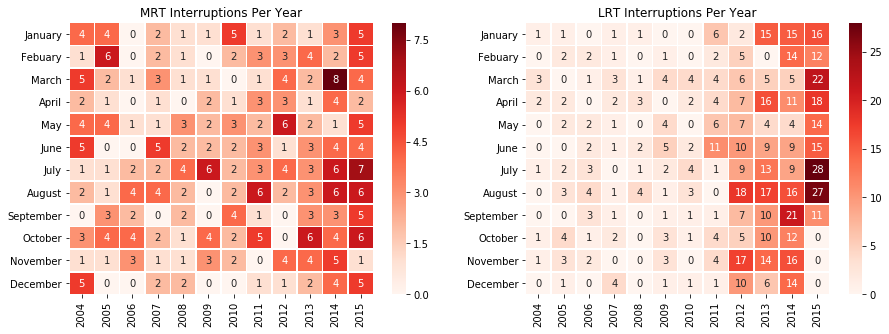

In [97]:
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(1,2,1)
ax = sns.heatmap(tempDFMRT,yticklabels = intPerYearMRT.iloc[:,0], linewidths = 0.5, cmap = 'Reds', annot=True)
ax.set_title("MRT Interruptions Per Year")

ax = fig.add_subplot(1,2,2)
ax = sns.heatmap(tempDFLRT,yticklabels = intPerYearMRT.iloc[:,0], linewidths = 0.5, cmap = 'Reds', annot=True)
ax.set_title("LRT Interruptions Per Year")


## FIGURE 1. Heatmap on the Frequency of Interruptions per Month for the MRT and LRT
The datasets are taken and mapped to appear redder at points when the interruption count of the specific railway system interruption count is high

    Initial Observations:
    - The interruptions of the LRT are more clustered than that of the MRT
    - The amount of LRT interruptions increases over time
    - It can be seen that the LRT has had the highest amount of interruptions in a single month

In [98]:
sumMRT = tempDFMRT.sum(axis = 0, skipna = True).tolist()
sumLRT = tempDFLRT.sum(axis = 0, skipna = True).tolist()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

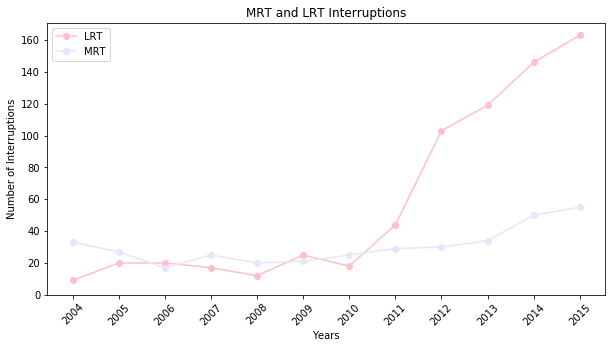

In [120]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1,1,1)
ax.plot(tempDFLRT.sum(axis = 0, skipna = True),label="LRT", marker='o',color="pink")

ax.plot(sumMRT,label="MRT", marker='o',color='lavender')

ax.set_ylabel('Number of Interruptions')
ax.set_xlabel('Years')
ax.set_title('MRT and LRT Interruptions')
ax.set_ylim(ymin=0)
ax.legend()

plt.xticks(rotation=45)

## FIGURE 2. Progression of LRT and MRT interruptions
The sum of the interruptions per year was taken from the LRT and MRT then the lines are layered on top of each other to easily compare the interruptions
    
    Initial Observations:
    - The LRT constantly increases from 2010 to 2015
    - The MRT fluctuates between 20 and 60
    - Both the LRT and MRT reached their highest interruption count on 2015

In [100]:
sumPH = []
for x,y in zip(sumMRT,sumLRT):
    sumPH.append(x+y)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

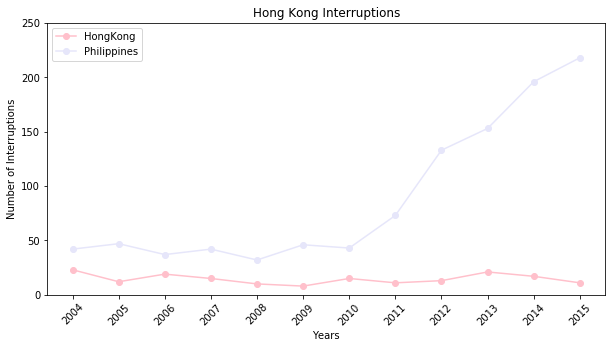

In [121]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1,1,1)

ax.plot(tempDFHK.sum(axis = 0, skipna = True), label="HongKong", marker='o',color="pink")

ax.plot(sumPH, label="Philippines", marker='o',color="lavender")

ax.set_ylabel('Number of Interruptions')
ax.set_xlabel('Years')
ax.set_title('Hong Kong Interruptions')
ax.set_ylim(ymin=0,ymax=250)

plt.legend()
plt.xticks(rotation=45)

## FIGURE 3. Progression of Philippines and HongKong interruptions 
The sum of the MRT and LRT interruptions per year were totaled and used to represent the Philippine Railway System, then layered with the number of Hong Kong MTR interruptions per year
    
    Initial Observations:
    - The Philippines consistently has a higher interruption count than Hong Kong
    - The Hong Kong interruptions does not consistently increase as time progresses
    - The Hong Kong and Philippine lines never intersect 

In [102]:
tempHK = intPerYearHK.drop(intPerYearHK.columns[[0,1,2,3,4,5,6,12,13,14,15]], axis=1)
totalIntHK = tempHK.sum(axis = 0, skipna = True)

tempPassHK = passPerYearHK.drop(passPerYearHK.columns[[0]],axis = 1)
totalPassHK = tempPassHK.sum(axis = 0, skipna = True)

Text(0, 0.5, 'Number of Passengers')

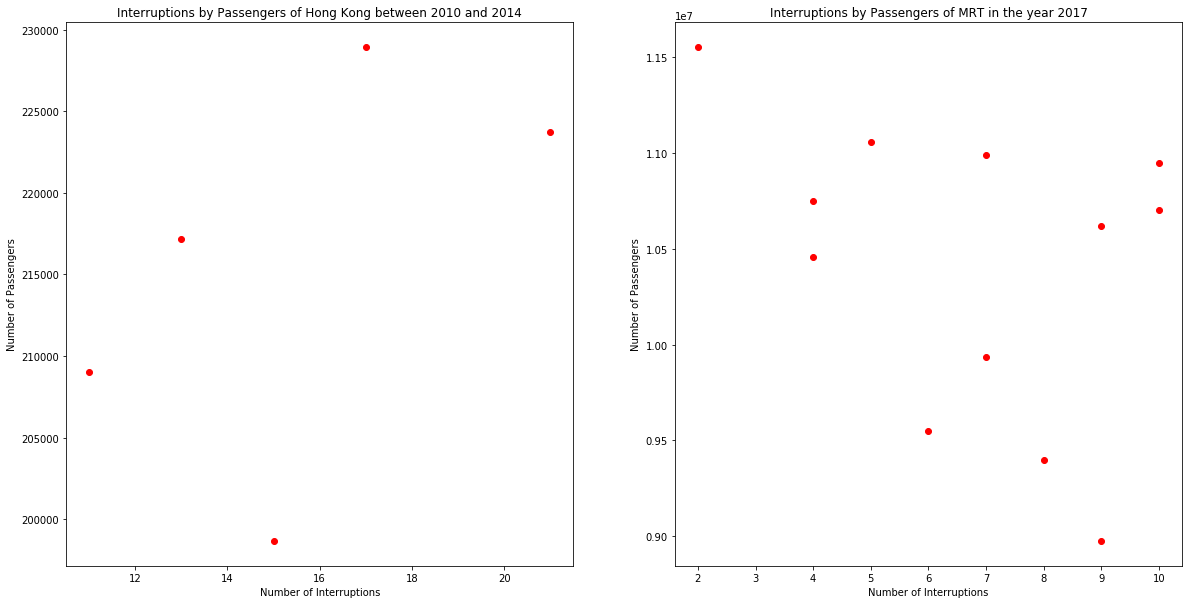

In [103]:
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(121)
ax.plot(totalIntHK, totalPassHK, 'ro')
ax.set_title('Interruptions by Passengers of Hong Kong between 2010 and 2014')
ax.set_xlabel('Number of Interruptions')
ax.set_ylabel('Number of Passengers')

ax = fig.add_subplot(122)
ax.plot(totalIntPerMonth, totalPassPerMonth, 'ro')
ax.set_title('Interruptions by Passengers of MRT in the year 2017')
ax.set_xlabel('Number of Interruptions')
ax.set_ylabel('Number of Passengers')

## FIGURE 4.  Scatter Plots of the interruptions by passengers of the MRT in 2017and Hong Kong from 2010 - 2014
The Hong Kong scatter plot is set at yearly since data is provided for the patronage of the MTR for the years 2010-2014, while the Philippine scatter plot is set at monthly since the only available data is more granular than that of Hong Kong
    
    Initial Observations:
    - The Hong Kong points are very far appart
    - The Philippines points are slightly more clustered 
    - Visually there is no correlation between interruptions and passengers

Text(0.5, 0, 'Years')

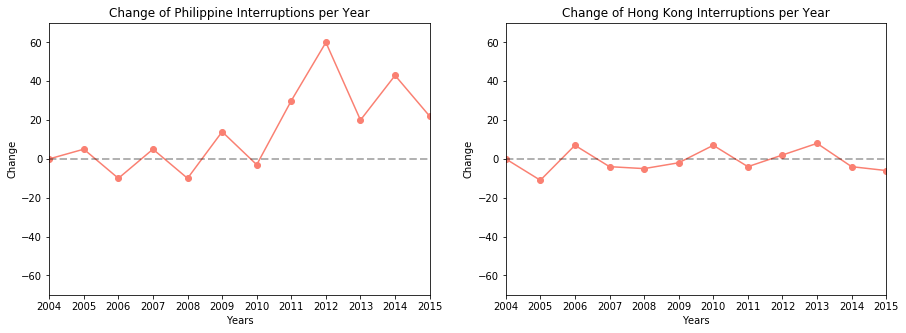

In [175]:
totalDFPH = pd.DataFrame(sumPH)
totalDictPH = {}
totalDictHK = {}
for year,val in zip(tempDFMRT.columns,totalDFPH.diff()[0]):
    totalDictPH[year] = val

totalDictPH['2004'] = 0

for year,val in zip(tempDFMRT.columns,tempDFHK.sum(axis = 0, skipna = True).diff()):
    totalDictHK[year] = val
    
totalDictHK['2004'] = 0
    
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(1,2,1)

ax.plot(list(totalDictPH.keys()),list(totalDictPH.values()), label="HongKong", marker='o',color="salmon")
ax.plot(['2004','2015'],[0,0], 'k', lw=2, linestyle='--', alpha=0.3)
ax.set_ylim(ymin=-70,ymax= 70)
ax.set_xlim(xmin='2004',xmax='2015')
ax.set_title("Change of Philippine Interruptions per Year")
ax.set_ylabel("Change")
ax.set_xlabel("Years")

ax = fig.add_subplot(1,2,2)

ax.plot(list(totalDictHK.keys()),list(totalDictHK.values()), label="HongKong", marker='o',color="salmon")
ax.plot(['2004','2015'],[0,0], 'k', lw=2, linestyle='--', alpha=0.3)
ax.set_ylim(ymin=-70,ymax= 70)
ax.set_xlim(xmin='2004',xmax='2015')
ax.set_title("Change of Hong Kong Interruptions per Year")
ax.set_ylabel("Change")
ax.set_xlabel("Years")

## FIGURE 5.  Line graphs of the change of interruptions per year in the Philippines and Hong Kong
The total of the interruptions of the Philippines and Hong Kong is taken and the change between the years is calculated and graphed
    
    Initial Observations:
    - There was almost a trend of increasing to decreasing every year for both countries
    - Hong Kong dips into the negative more often than the Philippines
    - Hong Kong decreases the amount of interruptions more often than the Philippines

# Statistical Tests

## T test to compare the means of the number of interruptions per year of both MRT to LRT and Philippines to Hong Kong

### Step 1: State the hypotheses.

$H_0$: $p = 0$ There is no difference in the average interruptions of the LRT and MRT

$H_a$: $p \not= 0$ There is a significant difference in the average interruptions of the LRT and MRT
### Step 2: Significance level $\alpha = 5\% $

### Step 3: Statistical test: T-Test

We will use a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values, since we are testing two mutually exclusive railway systems
Below is the Independent Samples T Test formula

## $$t = \frac{\mu_\text{A} - \mu_\text{B}}{\sqrt{(\frac{(\sum \text{A}^2 - \frac{(\sum \text{A})^2}{n_\text{A}})+(\sum \text{B}^2 - \frac{(\sum \text{B})^2}{n_\text{B}})}{n_\text{A}+n_\text{B}-2})(\frac{1}{n_\text{A}}+\frac{1}{n_\text{B}})}}$$

### Step 5: State decision rule
If the p-value < 0.05 from the t-test then we can successfully reject the null.

### T-Test result for MRT to LRT 

In [104]:
t_stat, p_val = ttest_ind(sumMRT, sumLRT)
print("Test statistic t = {:0.3f}".format(t_stat))
print("p-value = {:0.6f}".format(p_val))

Test statistic t = -1.622
p-value = 0.119046


### T-Test Result for Philippines to Hong Kong 

In [105]:
sumHK = tempDFHK.sum(axis = 0, skipna = True).tolist()

t_stat, p_val = ttest_ind(sumPH, sumHK)
print("Test statistic t = {:0.3f}".format(t_stat))
print("p-value = {:0.6f}".format(p_val))

Test statistic t = 3.771
p-value = 0.001052


## Conclusion:
For the p value of MRT to LRT we fail to reject the null hypothesis, but the p value of Philippines to Hong Kong tells us to reject the null hypothesis. This means that there may be no difference between the MRT and LRT and there is a significant difference between the Philippines and Hong Kong


## Spearman Rank Correlation between the amount of interruptions and patrons for the Philippines and Hong Kong 

### Step 1: State the hypotheses.

$H_0$: $p = 0$ There is no monotonic relationship between the number of interruptions and the number of passengers in the Philippines/Hong Kong


$H_a$: $p \not= 0$ There is a monotonic relationship between the number of interruptions and the number of passengers in the Philippines/Hong Kong

### Step 2: Significance level $\alpha = 5\% $

### Step 3: Statistical test: Spearman's Rank Correlation
Since central limit theorem states that the larger the sample size the more likely the data is normal, the data used for this study has a small sample size meaning that it has a low chance of being normal. Therefore we use spearman's correlation since it does not assume normality 

## $$p = 1 - \frac{6\sum d_\text{i}^2}{n(n^2-1)}$$

### Step 5: State decision rule
If the p-value < 0.05 from the t-test then we can successfully reject the null.

### Spearman's Correlation Results for the Philippines

In [106]:
stations = passPerMonthMRT['Station'].unique()
month = passPerMonthMRT['Month'].unique()
totalPassPerMonth = [0,0,0,0,0,0,0,0,0,0,0,0]
for station in stations:
    for x in range(12):
        totalPassPerMonth[x] += int(passPerMonthMRT.loc[(passPerMonthMRT['Month'] == month[x]) 
                                                        & (passPerMonthMRT['Station'] == station),'Exit'].tolist()[0])
totalIntPerMonth = intPerYearMRT.loc[:,'2017'].tolist()

In [107]:
r_stat, p_val = spearmanr(totalIntPerMonth, totalPassPerMonth)
print("Test statistic rho = {:0.3f}".format(r_stat))
print("p-value = {:0.6f}".format(p_val))

Test statistic rho = -0.324
p-value = 0.304307


### Spearman's Correlation Results for Hong Kong 

In [108]:
r_stat, p_val = spearmanr(totalIntHK, totalPassHK)
print("Test statistic rho = {:0.3f}".format(r_stat))
print("p-value = {:0.6f}".format(p_val))

Test statistic rho = 0.600
p-value = 0.284757


## Conclusion:
The p value for both tests is higher than the $\alpha$. Therefore, we can say that we fail to reject the null hypothesis for both tests, meaning that there may be no correlation for the interruptions to patronage for both the Philippines and Hong Kong 

# Descriptive Statistics

In [109]:
tempDFMRT.describe()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,2.750000,2.250000,1.416667,2.083333,1.666667,1.750000,2.083333,2.416667,2.500000,2.833333,4.166667,4.583333
std,1.815339,1.912875,1.564279,1.378954,1.073087,1.864745,1.443376,1.781640,1.834022,1.403459,1.898963,1.676486
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.750000,1.000000,1.000000,2.000000,3.000000,4.000000
50%,2.500000,1.500000,1.000000,2.000000,1.500000,1.500000,2.000000,2.500000,2.500000,3.000000,4.000000,5.000000
75%,4.250000,4.000000,2.250000,2.250000,2.000000,2.250000,2.250000,3.000000,4.000000,3.250000,5.250000,5.250000
max,5.000000,6.000000,4.000000,5.000000,4.000000,6.000000,5.000000,6.000000,6.000000,6.000000,8.000000,7.000000


In [110]:
tempDFLRT.describe()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,12.000000,12.000000,12.000000,12.000000,12.0000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.750000,1.666667,1.666667,1.416667,1.0000,2.083333,1.500000,3.666667,8.583333,9.916667,12.166667,13.583333
std,0.965307,1.302678,1.302678,1.164500,1.3484,1.676486,1.507557,3.055050,4.737823,5.333570,4.877282,9.765043
min,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000,0.000000
25%,0.000000,0.750000,0.750000,1.000000,0.0000,1.000000,0.000000,1.000000,5.750000,5.750000,9.000000,8.250000
50%,0.500000,2.000000,2.000000,1.000000,0.5000,1.500000,1.000000,4.000000,7.000000,10.000000,13.000000,14.500000
75%,1.000000,2.250000,2.250000,2.000000,1.2500,3.250000,2.250000,4.500000,10.000000,14.250000,15.250000,19.000000
max,3.000000,4.000000,4.000000,4.000000,4.0000,5.000000,4.000000,11.000000,18.000000,17.000000,21.000000,28.000000


In [111]:
tempDFHK.describe()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000
mean,4.600000,2.400000,3.800000,3.000000,2.000000,1.600000,3.000000,2.20000,2.600000,4.200000,3.400000,2.20000
std,10.285913,5.366563,8.497058,6.708204,4.472136,3.577709,6.164414,4.91935,5.813777,9.391486,7.602631,4.91935
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000
max,23.000000,12.000000,19.000000,15.000000,10.000000,8.000000,14.000000,11.00000,13.000000,21.000000,17.000000,11.00000


In [112]:
passPerMonthMRT.describe()

,Entry,Exit
count,1.560000e+02,1.560000e+02
mean,8.990074e+05,8.008109e+05
std,5.571895e+05,4.364783e+05
min,1.764200e+05,1.764200e+05
25%,4.459275e+05,4.357350e+05
50%,8.478085e+05,7.573375e+05
75%,1.020303e+06,1.107731e+06
max,2.266091e+06,1.954747e+06


In [113]:
passPerYearHK.describe()

,2010,2011,2012,2013,2014
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,16554.000000,17419.500000,18099.916667,18642.833333,19079.250000
std,864.475038,943.951125,710.579464,837.487132,962.877423
min,14464.000000,14895.000000,16812.000000,16427.000000,16568.000000
25%,16398.750000,17348.750000,17740.500000,18517.500000,19018.000000
50%,16705.500000,17605.500000,18273.000000,18819.000000,19280.000000
75%,17167.500000,17933.500000,18587.000000,19125.750000,19540.250000
max,17564.000000,18478.000000,18957.000000,19696.000000,20421.000000
